# Data Gathering and Preprocessing

In [27]:
#import libraries

%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import overpy
from gmplot import gmplot
import osmium as osm
import shapefile as shp

In [117]:
class OSMHandler(osm.SimpleHandler):
    def __init__(self):
        osm.SimpleHandler.__init__(self)
        self.osm_data = []

    def tag_inventory(self, elem, elem_type):
        for tag in elem.tags:
            self.osm_data.append([ elem.id, 
                                   elem.version,
                                   elem.visible,
                                   pd.Timestamp(elem.timestamp),
                                   elem.uid,
                                   elem.user,
                                   elem.changeset,
                                   elem.lat,
                                   elem.lon])
'''
    def node(self, n):
        self.tag_inventory(n, "node")

    def way(self, w):
        self.tag_inventory(w, "way")

    def relation(self, r):
        self.tag_inventory(r, "relation")
'''

osmhandler = OSMHandler()
osmhandler.apply_file("map.osm")
data_colnames = ['id', 'version', 'visible','uid',
                 'user', 'changeset', 'timestamp', 'lat', 'lon']
df_osm = pd.DataFrame(osmhandler.osm_data, columns=data_colnames)
df_osm = tag_genome.sort_values(by=['id', 'lat','lon'])

In [120]:
df_osm.columns

Index(['id', 'version', 'visible', 'uid', 'user', 'changeset', 'timestamp',
       'lat', 'lon'],
      dtype='object')

In [17]:
api = overpy.Overpass()
result = api.query("node(  28.6123, 77.1847, 28.6490, 77.2548  );out;") #overpass api to get nodes of particular area

In [26]:
'''data from api is in the form 
  {
  "type": "node",
  "id": 248852574,
  "lat": 28.5334920,
  "lon": 77.1518947,
  "tags": {
    "amenity": "cafe",
    "name": "Cafe Coffee Day"
  }
  tags store only relevant attribute to be used'''
tags=[]
for i in result.nodes:
    if len(i.tags) is not 0:
        i_tags = i.tags
        i_tags['node_id'] = i.id
        i_tags['lat'] = float(i.lat)
        i_tags['lon'] = float(i.lon)
        tags.append(i.tags)
        
        
print(len(tags))
tags[0]

1762


{'admin_level': '2',
 'alt_name:ar': 'نيودلهي',
 'capital': 'yes',
 'is_capital': 'country',
 'is_in': 'National Capital Region, NCR, India',
 'is_in:continent': 'Asia',
 'is_in:country': 'India',
 'is_in:country_code': 'IN',
 'is_in:iso_3166_2': 'IN-DL',
 'lat': 28.6141793,
 'lon': 77.2022662,
 'name': 'New Delhi',
 'name:ace': 'New delhi',
 'name:af': 'Nieu-Delhi',
 'name:am': 'ኒው ዴሊ',
 'name:an': 'Nueva Delhi',
 'name:ang': 'Nīƿe Delhi',
 'name:ar': 'دلهي الجديدة',
 'name:bat-smg': 'Naujasės Delės',
 'name:be': 'Нью-Дэлі',
 'name:be-tarask': 'Нью-Дэлі',
 'name:bg': 'Ню Делхи',
 'name:bn': 'নতুন দিল্লি',
 'name:bo': 'ནེའུ་དིལ་ལི།',
 'name:bpy': 'নুৱা দিল্লী',
 'name:br': 'New Delhi',
 'name:bs': 'New Delhi',
 'name:ca': 'Nova Delhi',
 'name:cbk-zam': 'Nueva Delhi',
 'name:ckb': 'نیودلھی',
 'name:co': 'New Delhi',
 'name:crh': 'Nyu Deli',
 'name:cs': 'Nové Dillí',
 'name:cy': 'Delhi Newydd',
 'name:da': 'New Delhi',
 'name:de': 'Neu-Delhi',
 'name:diq': 'Delhiyo Newe',
 'name:dv': 'ނި

In [27]:
df = pd.DataFrame(tags) # storing data in dataframe for easy access
df.head()

,access,addr:city,addr:country,addr:district,addr:full,addr:housename,addr:housenumber,addr:place,addr:postcode,addr:state,...,tourism,traffic_calming,traffic_signals,train,vending,waste,website,wheelchair,wikidata,wikipedia
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q987,en:New Delhi
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
dir_data = 'C:/Users/Admin/deeplearning2/atlan_data'

if not os.path.exists(dir_data) : os.mkdir(dir_data)

In [29]:
file_name = dir_data + 'delhi' + '-overpass.csv'
df.to_csv(file_name, index=False)
print(file_name)

atlan_data/delhi-overpass.csv


In [30]:
df = df[['node_id', 'lat', 'lon', 'name', 'amenity']]
df.head()

,node_id,lat,lon,name,amenity
0,16173236,28.614179,77.202266,New Delhi,NaN
1,249783293,28.629894,77.219485,NaN,NaN
2,249783302,28.631410,77.216760,NaN,NaN
3,249783316,28.635719,77.219883,NaN,NaN
4,249791141,28.612841,77.240186,NaN,NaN


In [31]:
df1 = df.copy()
df = df.dropna(subset=['node_id', 'lat', 'amenity'])
df.head()

,node_id,lat,lon,name,amenity
13,280741143,28.647250,77.194235,Axis Bank,bank
41,496457116,28.617599,77.249791,NaN,fuel
42,496457118,28.618616,77.249307,Indraprastha Gas Limited,fuel
46,496457133,28.640344,77.244660,Samata Sthal,grave_yard
49,498724140,28.648841,77.248030,Shanti Van,memorial


In [32]:
file_name = dir_data + 'delhi' + '-amenity.csv'
df.to_csv(file_name, index=False)
print(file_name)

atlan_data/delhi-amenity.csv


In [33]:
amen = list(set(df['amenity']))

In [34]:
# non-commercial areas removal

remove_amenity =  [
    'arts_centre',
    "Ayurvedic Hospital",
    "baby_hatch",
    "bench",
    "bicycle_parking",
    "bicycle_rental",
    "bicycle_repair_station",
    "bureau_de_change",
    "car_rental",
    "car_wash",
    "charging_station",
    "fountain",
    "grave_yard",
    "House",
    "language_school",
    "meditation_centre",
    "motorcycle_parking",
    "orphanage",
    "payment_terminal",
    "photo_booth",
    "post_depot",
    "recycling",
    "shelter",
    "social_centre",
    "social_facility",
    "telephone",
    "training",
    "tuition",
    "vending_machine",
    "veterinary",
    "waste_basket",
    "waste_disposal",
    "waste_transfer_station",
    "water_point",
    "weighbridge",
]

In [35]:
for val in remove_amenity:
    df = df[df.amenity != val]
df.head()

,node_id,lat,lon,name,amenity
13,280741143,28.647250,77.194235,Axis Bank,bank
41,496457116,28.617599,77.249791,NaN,fuel
42,496457118,28.618616,77.249307,Indraprastha Gas Limited,fuel
49,498724140,28.648841,77.248030,Shanti Van,memorial
66,611105438,28.640555,77.210763,MyBar,pub


In [36]:
file_name = dir_data + 'delhi' + '-filtered_amenity.csv'
df.to_csv(file_name, index=False)
print(file_name)

atlan_data/delhi-filtered_amenity.csv


In [5]:
data = pd.read_csv("atlan_data/delhi-filtered_amenity.csv")
data.head()

,node_id,lat,lon,name,amenity
0,280741143,28.647250,77.194235,Axis Bank,bank
1,496457116,28.617599,77.249791,NaN,fuel
2,496457118,28.618616,77.249307,Indraprastha Gas Limited,fuel
3,498724140,28.648841,77.248030,Shanti Van,memorial
4,611105438,28.640555,77.210763,MyBar,pub


In [6]:
data.columns

Index(['node_id', 'lat', 'lon', 'name', 'amenity'], dtype='object')

# Data Analysis and vizualization

In [9]:
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [11]:
# shapefile for delhi showing routes and some sample data points

street_map = gpd.read_file('C:/Users/Admin/deeplearning2/atlan_data/delhi_poi/delhi_poi.shp')

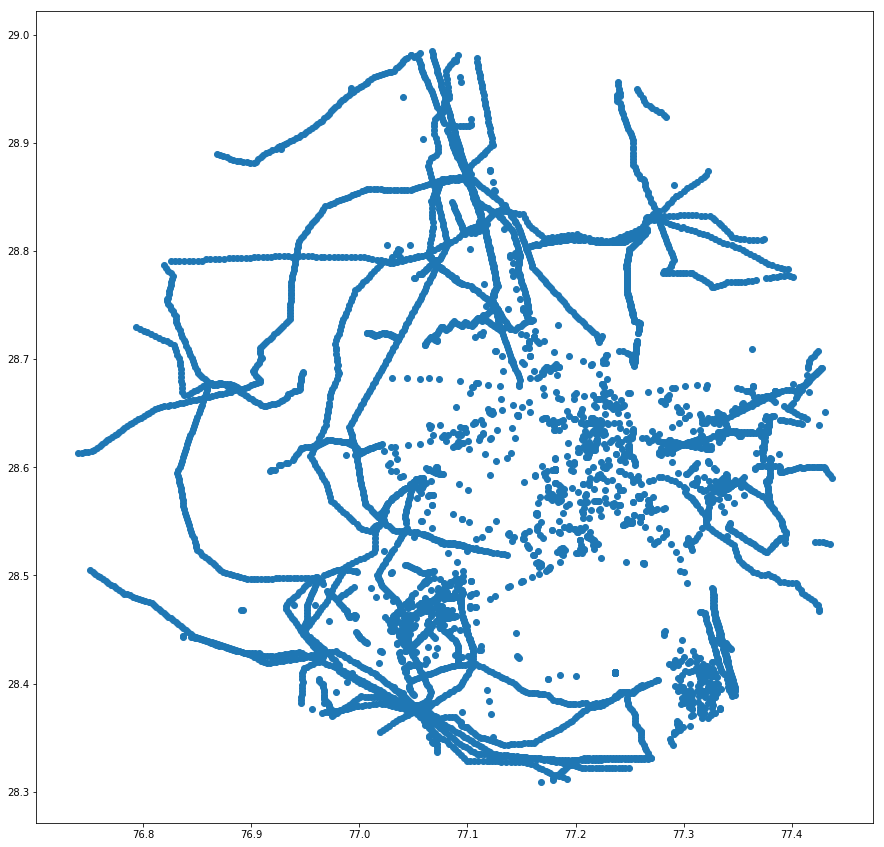

In [12]:
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [13]:
# shapefile for delhi 

street_map1 = gpd.read_file('C:/Users/Admin/deeplearning2/atlan_data/Archive/wards delimited.shp')

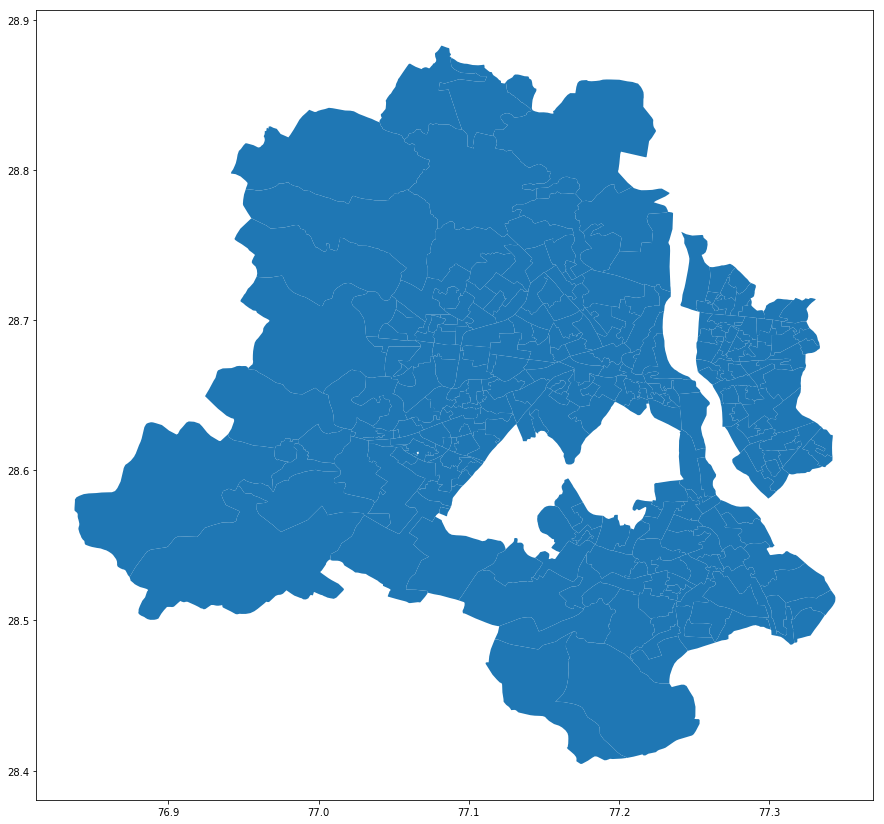

In [16]:
fig,ax1 = plt.subplots(figsize=(15,15))
street_map1.plot(ax=ax1)

In [7]:
# EPSG 4326 defines a full coordinate reference system, providing spatial meaning to otherwise meaningless pairs of numbers.
# It means "latitude and longitude coordinates on the WGS84 reference ellipsoid."
# coordinate reference system (CRS) is a coordinate-based local,
# regional or global system used to locate geographical entities

crs = {'init' : 'epsg:4326'}

In [10]:
#geometry defines the points of latitude and longitude

geometry = [Point(xy) for xy in zip(data['lat'],data['lon'])]
geometry[:3]

In [11]:
# creating dataframe with geometry

geo_df = gpd.GeoDataFrame(data,
                          crs=crs,
                          geometry=geometry)

In [12]:
geo_df1 = geo_df.copy()

In [13]:
geo_df1.head()

,node_id,lat,lon,name,amenity,geometry
0,280741143,28.647250,77.194235,Axis Bank,bank,POINT (28.64725 77.19423)
1,496457116,28.617599,77.249791,NaN,fuel,POINT (28.61760 77.24979)
2,496457118,28.618616,77.249307,Indraprastha Gas Limited,fuel,POINT (28.61862 77.24931)
3,498724140,28.648841,77.248030,Shanti Van,memorial,POINT (28.64884 77.24803)
4,611105438,28.640555,77.210763,MyBar,pub,POINT (28.64056 77.21076)


In [14]:
# finding the unique amenities in the data 

geo_df.amenity.unique() 

array(['bank', 'fuel', 'memorial', 'pub', 'atm', 'toilets', 'hospital',
       'restaurant', 'cinema', 'parking', 'cafe', 'place_of_worship',
       'club', 'bus_station', 'theatre', 'fast_food', 'bar', 'school',
       'library', 'community_centre', 'clinic', 'post_office', 'doctors',
       'pharmacy', 'post_box', 'police', 'embassy', 'dentist',
       'drinking_water', 'food_court', 'college', 'ice_cream',
       'fire_station', 'nightclub', 'taxi', 'music_school',
       'kindergarten', 'internet_cafe', 'blood_bank'], dtype=object)

In [15]:
li = geo_df.amenity.unique() 
li

array(['bank', 'fuel', 'memorial', 'pub', 'atm', 'toilets', 'hospital',
       'restaurant', 'cinema', 'parking', 'cafe', 'place_of_worship',
       'club', 'bus_station', 'theatre', 'fast_food', 'bar', 'school',
       'library', 'community_centre', 'clinic', 'post_office', 'doctors',
       'pharmacy', 'post_box', 'police', 'embassy', 'dentist',
       'drinking_water', 'food_court', 'college', 'ice_cream',
       'fire_station', 'nightclub', 'taxi', 'music_school',
       'kindergarten', 'internet_cafe', 'blood_bank'], dtype=object)

In [16]:
# mapping each amenity to a number

mapping = {'bank':1, 'fuel':2, 'memorial':3, 'pub':4, 'atm':5, 'toilets':6, 'hospital':7,
       'restaurant':8, 'cinema':9, 'parking':10, 'cafe':11, 'place_of_worship':12,
       'club':13, 'bus_station':14, 'theatre':15, 'fast_food':16, 'bar':17, 'school':18,
       'library':19, 'community_centre':20, 'clinic':21, 'post_office':22, 'doctors':23,
       'pharmacy':24, 'post_box':25, 'police':26, 'embassy':27, 'dentist':28,
       'drinking_water':29, 'food_court':30, 'college':31, 'ice_cream':32,
       'fire_station':33, 'nightclub':34, 'taxi':35, 'music_school':36,
       'kindergarten':37, 'internet_cafe':38, 'blood_bank':39}

geo_df1['amenity'] = geo_df1['amenity'].map(mapping)
geo_df1['amenity'] = geo_df1['amenity'].fillna(0)


In [17]:
geo_df1.head()

,node_id,lat,lon,name,amenity,geometry
0,280741143,28.647250,77.194235,Axis Bank,1,POINT (28.64725 77.19423)
1,496457116,28.617599,77.249791,NaN,2,POINT (28.61760 77.24979)
2,496457118,28.618616,77.249307,Indraprastha Gas Limited,2,POINT (28.61862 77.24931)
3,498724140,28.648841,77.248030,Shanti Van,3,POINT (28.64884 77.24803)
4,611105438,28.640555,77.210763,MyBar,4,POINT (28.64056 77.21076)


# Plotting and Clustering of Data Points

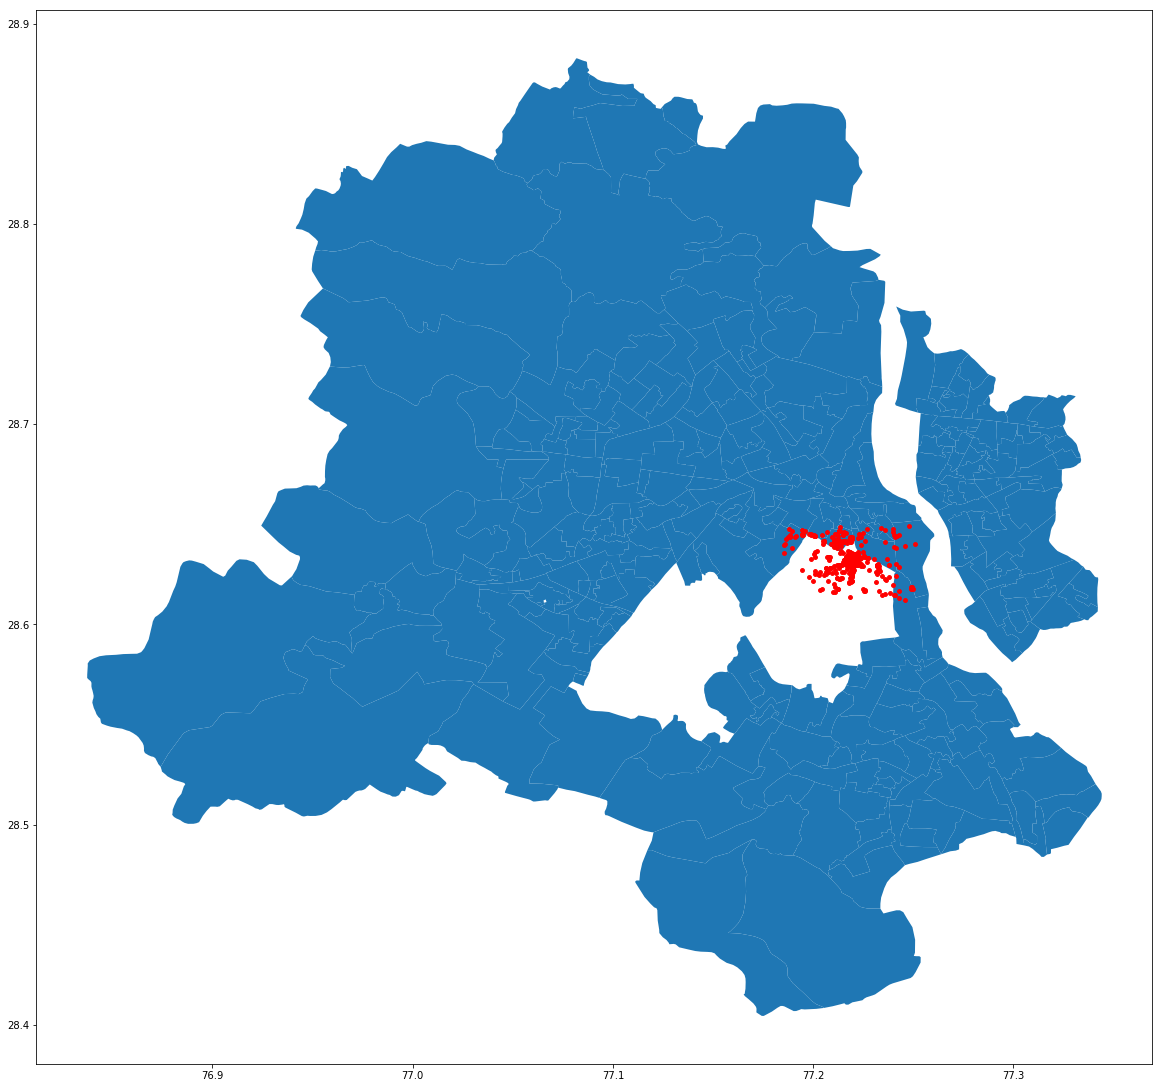

In [75]:
# plotting geometry(POINTS) on the delhi shapefile 

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(geo_df1['lon'], geo_df1['lat'])]
gdf = GeoDataFrame(geo_df1, geometry=geometry)   

#this is a map that goes with geopandas
street_map1 = gpd.read_file('C:/Users/Admin/deeplearning2/atlan_data/Archive/wards delimited.shp')
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=street_map1.plot(figsize=(20,20)), marker='o', color='red', markersize=15);

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from collections import Counter
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.read_csv('atlan_data/delhi-filtered_amenity.csv')
coords = df.as_matrix(columns=['lat', 'lon'])
db = DBSCAN( algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
X=geo_df1.loc[:,['lat','lon']]

### Elbow method to find optimal number of clusters

In [139]:
# Transforms features by scaling each feature to a given range.
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

In [142]:
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

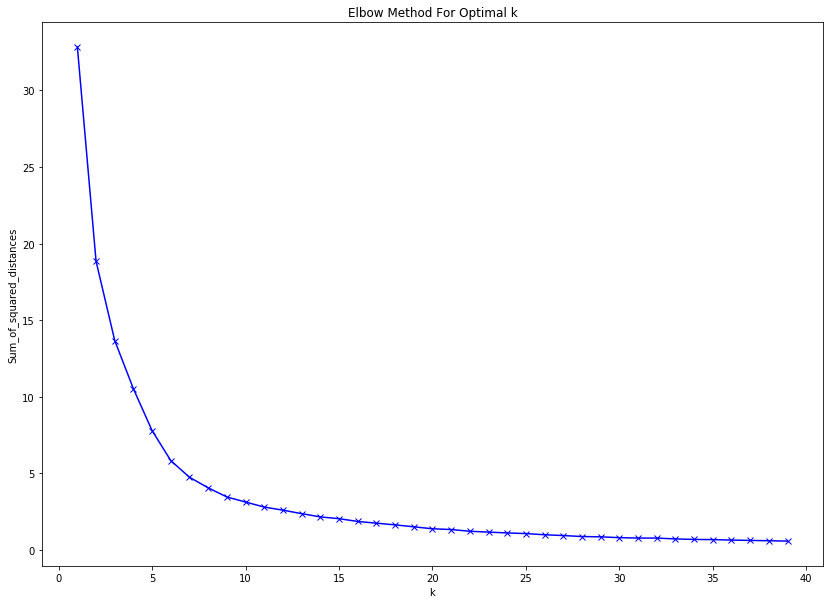

In [143]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
id_n1=7
kmeans = KMeans(n_clusters=id_n1, random_state=0).fit(X)
id_label_1=kmeans.labels_ #id of clusters labeled from 0-6

In [20]:
id_label_1

array([1, 3, 3, 2, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6,
       6, 6, 2, 0, 4, 5, 4, 6, 3, 1, 6, 4, 0, 5, 3, 3, 1, 6, 6, 6, 6, 5,
       5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 1, 1, 1, 6, 0, 6,
       6, 0, 6, 6, 0, 6, 4, 4, 4, 2, 3, 6, 5, 6, 6, 6, 0, 6, 6, 6, 6, 6,
       6, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 0, 0, 4,
       4, 0, 0, 4, 4, 4, 4, 4, 6, 6, 0, 0, 6, 6, 0, 6, 0, 0, 0, 6, 0, 6,
       6, 6, 6, 5, 0, 6, 0, 0, 0, 6, 6, 3, 1, 0, 3, 0, 0, 3, 0, 0, 6, 0,
       5, 0, 6, 2, 6, 3, 5, 6, 6, 0, 0, 6, 2, 0, 4, 6, 6, 6, 6, 6, 6, 6,
       4, 6, 6, 6, 0, 1, 6, 0, 1, 0, 0, 2, 0, 6, 6, 6, 4, 4, 2, 2, 6, 6,
       0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 3, 3, 3, 1, 6, 4, 5, 0, 0, 0,
       6, 0, 3, 4, 4, 4, 4, 0, 3, 3, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 4,
       3, 6, 4, 4, 6, 0, 0, 0, 0, 0, 6, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 6, 3, 0, 0, 0, 4, 1, 0, 6, 1, 1, 0,

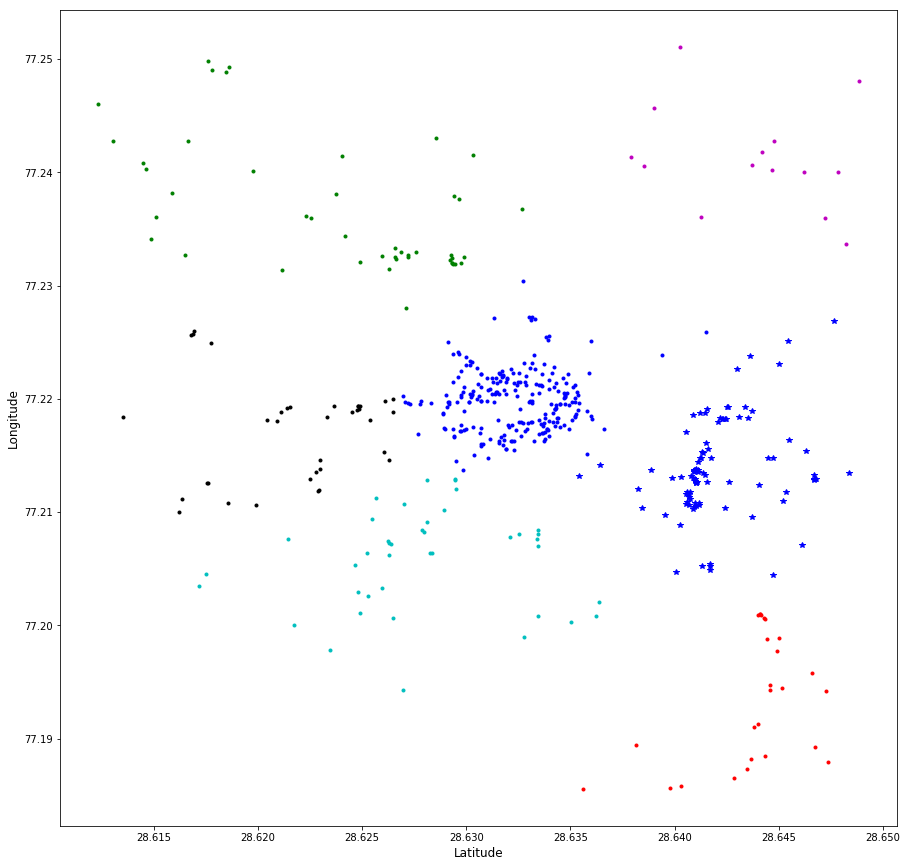

In [25]:
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*']);
plt.figure(figsize=(15,15))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n1):
    cluster=np.where(id_label_1==i)[0]
    plt.plot(X.lat[cluster].values,X.lon[cluster].values,ptsymb[i],label=li)
#plt.legend(li)
plt.show()


In [86]:
# cluster for every unique amenity to see where all the commercial areas lie indifferent to each other
id_n=39
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_ ##id of clusters labeled from 1-39

In [87]:
id_label

array([ 3, 15, 15, 26, 30, 33,  8, 33, 30,  1, 19, 19, 19, 19, 24,  1,  1,
       24,  1,  1, 10, 10, 10, 10, 21, 25, 35,  9, 11, 30, 23, 17,  5, 22,
        1, 14,  7,  7,  3,  5, 30,  5,  5, 31, 31,  1, 26, 27, 29,  8, 24,
       29, 29, 29, 19,  1, 29,  1,  8, 23, 20, 20, 20, 30,  8,  5, 10, 24,
       25, 30, 27, 18, 28, 28, 28, 21, 36,  5, 31, 25,  5,  5,  8,  5,  5,
        5,  5, 30,  5,  7,  7, 19, 19, 19, 29, 19,  1, 27,  1,  1, 24, 18,
       18, 18, 18, 18, 18,  8,  8,  0, 22,  8,  8,  0,  0,  0, 22, 22, 30,
        5, 19, 19, 30, 30, 19,  5, 29,  1, 19,  5, 19,  5, 30, 18, 18, 37,
        8, 30, 19, 29, 29, 30, 10,  2,  3, 24, 32,  1, 24,  7, 29, 12, 30,
       24, 38,  8,  5, 26,  5,  7, 14, 18, 30, 29, 19, 10,  4,  1, 11, 10,
       10, 10, 10, 33, 30,  5, 22, 10,  5,  5,  8,  3,  5,  8, 13,  8, 19,
       26, 19, 10, 10, 10, 11, 11, 21, 34,  5, 18,  1,  1, 29, 19, 19, 30,
       19, 24, 29, 19,  1, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 27, 27,
       27, 27, 27, 27, 27

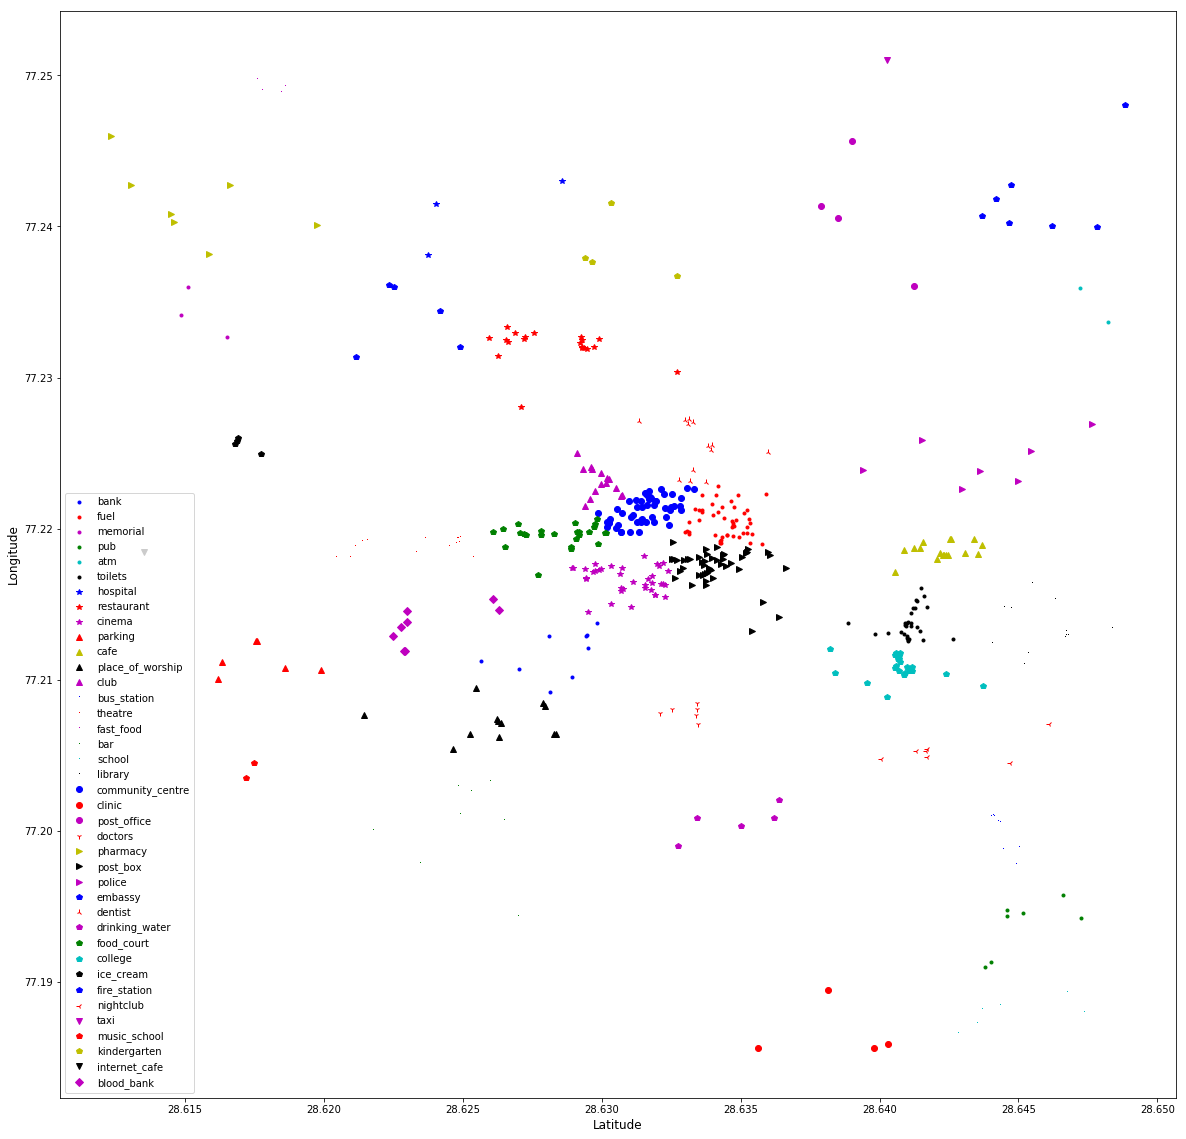

In [111]:
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^','y^','k^','m^',
                  'b,','r,','m,','g,','c,','k,','bo','ro','mo','r1','y>','k>','m>',
                  'bp','r2','mp','gp','cp','kp','bp','r3','mv','rp','yp','kv','mD']);
plt.figure(figsize=(20,20))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.lat[cluster].values,X.lon[cluster].values,ptsymb[i],label=li)
plt.legend(li)
plt.show()


In [30]:
X1 = np.array(X)

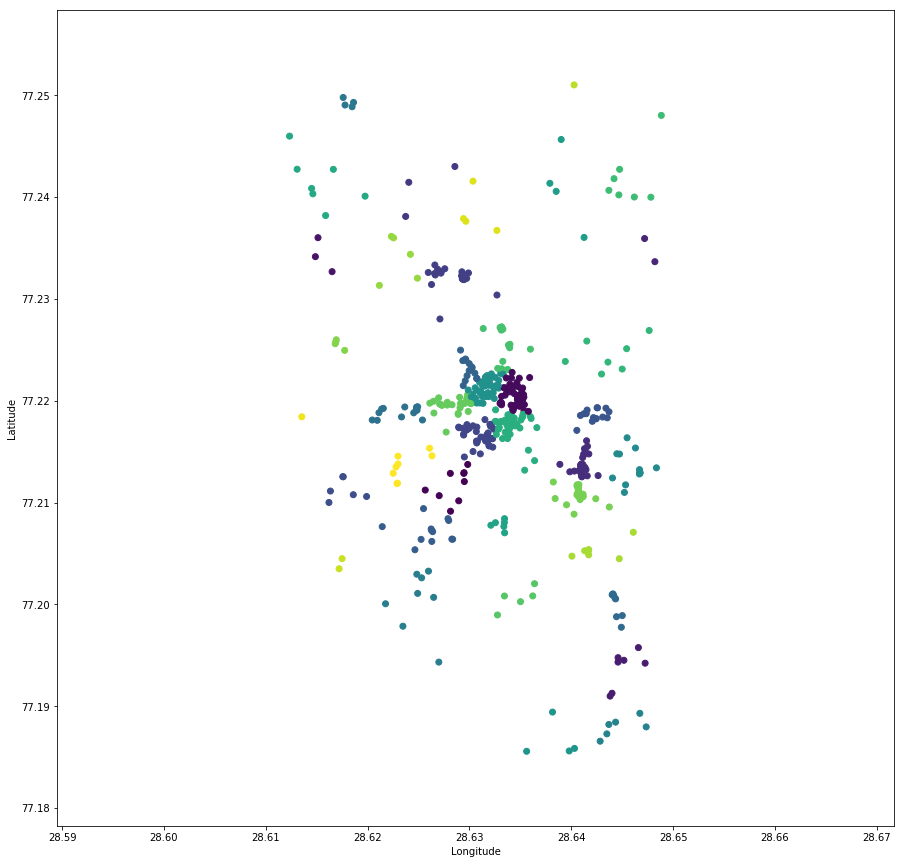

In [108]:
plt.figure(figsize=(15, 15))
# plottng latitude and longitude 
plt.scatter(X1[:,0], X1[:,1], c=id_label.astype(float))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

# DBSCAN

In [47]:
import os
os.environ['PROJ_LIB'] = 'C:/Users/Admin/Anaconda3/pkgs/pyproj-1.9.5.1-py36_0/Lib/site-packages/pyproj/data/'

In [83]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn import metrics
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler

In [110]:
X1_1 = StandardScaler().fit_transform(X1)

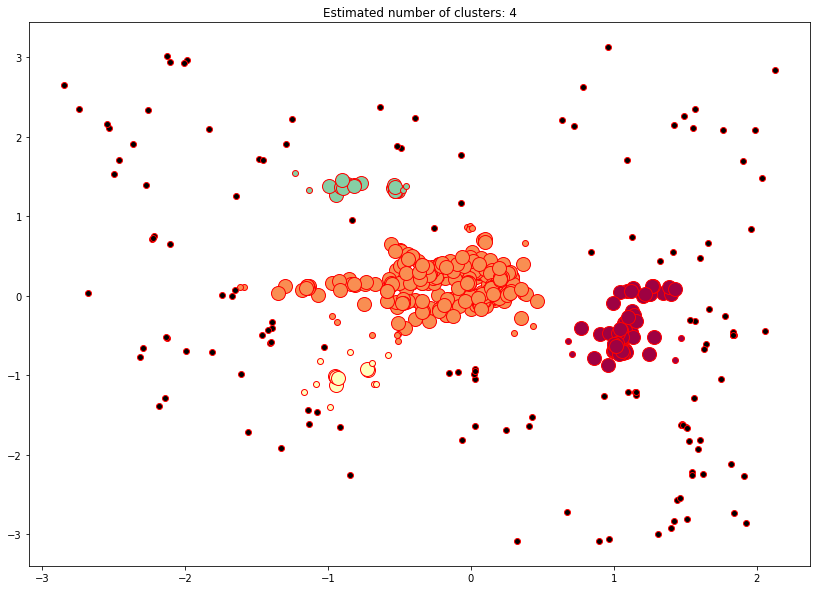

In [152]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X1_1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X1_1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='r', markersize=14)

    xy = X1_1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='r', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()